## [데이터 분석]
- 분석가능한 기존데이터에서 패턴을 찾고 미래의 데이터를 예측하거나 분류하는 것
- 분석가능한 데이터: 중앙에 밀집되어 있는 데이터
- 머신러닝(정형데이터분석) - 기존의 통계학적에 기반한 ML, 인공신경망(텐서플로우) 기반의 ML

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = 'C:/Workspace/분석데이터활용/pandasData분석/data/part3/auto-mpg.csv'

In [42]:
df = pd.read_csv(file_path,header=None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


## Part1 [기술통계]
- 편차구하는 공식
- 분산
- 표준편차

In [6]:
a = [1,1,1,12]
b = [3,5,3,4]
suma, sumb = 0,0
for numa, numb in zip(a,b):
    suma +=numa
    sumb += numb
print(suma/len(a))
print(sumb/len(b))

3.75
3.75


In [7]:
# 중앙값 - 전체 데이터를 정렬한 후 가운데 값
b = sorted(b)
print(b)
center = int(len(a)/2)
(a[center-1]+a[center])/2

[3, 3, 4, 5]


In [10]:
def median(var):
    var.sort()
    if len(var) % 2 ==0:
        center = int(len(var)/2)
        print((var[center-1]+var[center])/2)
    else:
        center = round(len(var)/2,0)
        print(var[center])

In [37]:
# 최빈값
def get_mode(var):
    count = []
    for i in range(len(var)):
        count_num = 0
        for k in range(len(var)):
            if var[k] == var[i]:
                count_num += 1
            else:
                continue
        count.append(count_num)
    return var[count.index(max(count))]

In [38]:
get_mode(a)

1

In [22]:
# 표준편차
np.std(a)

4.763139720814412

In [36]:
np.std(a), np.var(a) # 표준편차, 분산

(4.763139720814412, 22.6875)

In [39]:
np.mean(b)

3.75

In [46]:
np.std(a)

4.763139720814412

In [45]:
tmp = pd.DataFrame(a)
tmp.describe() # numpy로 계산한 표준편차와 다르게 나옴(이유: 판다스는 표본집단을 기준으로 계산하기 때문에 다르게 나옴)

,0
count,4.00
mean,3.75
std,5.50
min,1.00
25%,1.00
50%,1.00
75%,3.75
max,12.00


In [48]:
tmp.std(),tmp.std(ddof=0) # ddof를 0으로 하면 모집단으로 계산함.

(0    5.5
 dtype: float64,
 0    4.76314
 dtype: float64)

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [44]:
df.describe()

,0,1,2,4,5,6,7
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [51]:
df.std(ddof=0) ,df.std(ddof=1)

<ipython-input-51-d15d68d367be>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std(ddof=0) ,df.std(ddof=1)


(0      7.806159
 1      1.698866
 2    104.138764
 4    845.777234
 5      2.754222
 6      3.692978
 7      0.801047
 dtype: float64,
 0      7.815984
 1      1.701004
 2    104.269838
 4    846.841774
 5      2.757689
 6      3.697627
 7      0.802055
 dtype: float64)

In [52]:
df.corr() # 상관계수

,0,1,2,4,5,6,7
0,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
1,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
2,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
4,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
5,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
6,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
7,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [55]:
# 상관계수는 숫자를 scaling(단위를 바꿈)하고 계산해도 됨
df[[7,5]].corr()

,7,5
7,1.000000,0.205873
5,0.205873,1.000000


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\igksj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


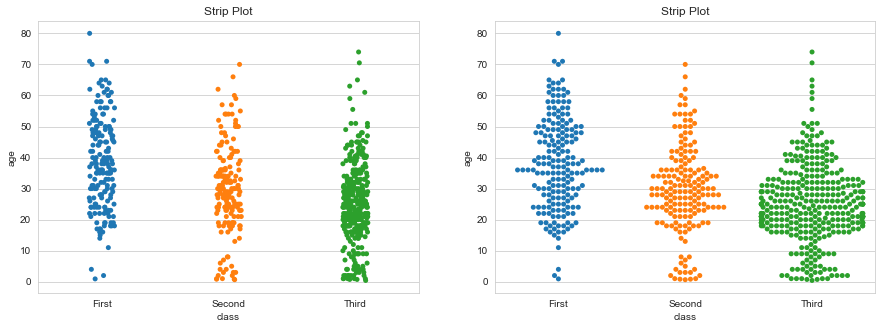

In [59]:
titanic = sns.load_dataset('titanic')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x='class',
        y='age',
        data=titanic,
        ax=ax1)
sns.swarmplot(x='class',
        y='age',
        data=titanic,
        ax=ax2)
ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

In [58]:
x = [1,2,3,4]
y = [1,3,5,7]
np.corrcoef(x,y)

array([[1., 1.],
       [1., 1.]])

In [69]:
df = pd.read_excel('C:/Workspace/분석데이터활용/pandasData분석/data/part4/남북한발전전력량.xlsx')

df.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [63]:
df_ns = df.iloc[[0,5],3:]
df_ns.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
5,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


In [64]:
df_ns.index = ['South','North']
df_ns.columns = df_ns.columns.map(int)
df_ns

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
North,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


In [76]:
df_ns = df_ns.astype('int')
df_ns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, South to North
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1991    2 non-null      int32
 1   1992    2 non-null      int32
 2   1993    2 non-null      int32
 3   1994    2 non-null      int32
 4   1995    2 non-null      int32
 5   1996    2 non-null      int32
 6   1997    2 non-null      int32
 7   1998    2 non-null      int32
 8   1999    2 non-null      int32
 9   2000    2 non-null      int32
 10  2001    2 non-null      int32
 11  2002    2 non-null      int32
 12  2003    2 non-null      int32
 13  2004    2 non-null      int32
 14  2005    2 non-null      int32
 15  2006    2 non-null      int32
 16  2007    2 non-null      int32
 17  2008    2 non-null      int32
 18  2009    2 non-null      int32
 19  2010    2 non-null      int32
 20  2011    2 non-null      int32
 21  2012    2 non-null      int32
 22  2013    2 non-null      int32
 23  2014    2 non-nu

      South  North
1991   1186    263
1992   1310    247
1993   1444    221
1994   1650    231
1995   1847    230




<AxesSubplot:>

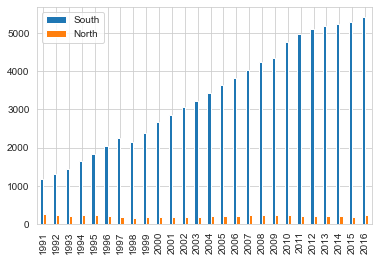

In [77]:
tdf = df_ns.T
print(tdf.head())
print('\n')
tdf.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

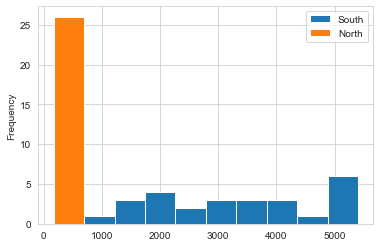

In [78]:
tdf.plot(kind='hist')